## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [13]:
df = pd.read_csv('QueryResults.csv',header=0, names=['DATE', 'TAG', 'POSTS'])
df['DATE'] = pd.to_datetime(df['DATE'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [14]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


In [15]:
df.tail()

,DATE,TAG,POSTS
2756,2025-02-01,php,377
2757,2025-02-01,python,2360
2758,2025-02-01,r,519
2759,2025-02-01,ruby,56
2760,2025-02-01,swift,340


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [16]:
print(df.shape)

(2761, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
df.count()

DATE     2761
TAG      2761
POSTS    2761
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [18]:
by_language = df.groupby('TAG').agg(
    POSTS=('POSTS', 'sum'),
    first_date=('DATE', 'min'),
    last_date=('DATE', 'max'))
by_language['MONTHS'] = (by_language['last_date'].dt.to_period('M') - by_language['first_date'].dt.to_period('M')).apply(lambda x: x.n)
by_language = by_language.drop(columns=['first_date', 'last_date'])
by_posts = by_language.sort_values(by='POSTS', ascending=False)
by_posts

,POSTS,MONTHS
TAG,,
javascript,2531199,198
python,2210884,198
java,1919282,198
c#,1624165,199
php,1467569,198
c++,813325,198
r,510363,197
c,407423,198
swift,336130,193


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [19]:
by_months = by_language.sort_values(by='MONTHS')
by_months

,POSTS,MONTHS
TAG,,
go,74266,183
swift,336130,193
r,510363,197
assembly,45015,198
java,1919282,198
delphi,52402,198
c++,813325,198
c,407423,198
python,2210884,198


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [20]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [21]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS').fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01,89.0,465.0,1588.0,917.0,84.0,177.0,1506.0,1874.0,21.0,649.0,3471.0,784.0,63.0,458.0
2024-11-01,98.0,401.0,1352.0,845.0,56.0,125.0,1257.0,1635.0,20.0,539.0,3136.0,693.0,75.0,386.0
2024-12-01,90.0,328.0,1088.0,686.0,42.0,114.0,1164.0,1387.0,24.0,428.0,2694.0,549.0,52.0,316.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [23]:
print(reshaped_df.shape)

(200, 14)


In [24]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1122.0,630.0,129.0,474.0,534.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1145.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [25]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-10-01,89.0,465.0,1588.0,917.0,84.0,177.0,1506.0,1874.0,21.0,649.0,3471.0,784.0,63.0,458.0
2024-11-01,98.0,401.0,1352.0,845.0,56.0,125.0,1257.0,1635.0,20.0,539.0,3136.0,693.0,75.0,386.0
2024-12-01,90.0,328.0,1088.0,686.0,42.0,114.0,1164.0,1387.0,24.0,428.0,2694.0,549.0,52.0,316.0
2025-01-01,68.0,327.0,1139.0,692.0,56.0,134.0,1167.0,1427.0,25.0,519.0,2706.0,527.0,50.0,344.0
2025-02-01,65.0,283.0,1041.0,627.0,60.0,106.0,980.0,1250.0,17.0,377.0,2360.0,519.0,56.0,340.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [26]:
reshaped_df.count()

TAG
assembly      200
c             200
c#            200
c++           200
delphi        200
go            200
java          200
javascript    200
perl          200
php           200
python        200
r             200
ruby          200
swift         200
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

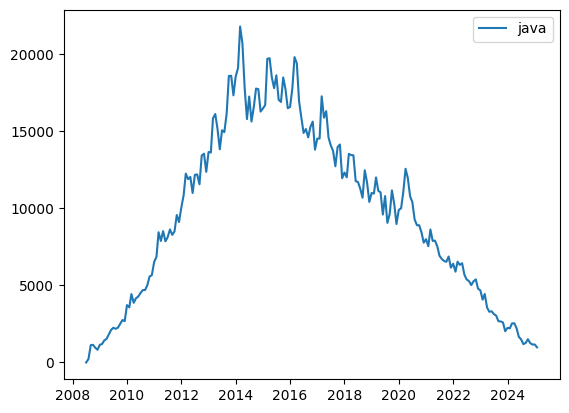

In [ ]:
fig, ax = plt.subplots()
ax.plot(reshaped_df.index, reshaped_df['java'], label='java')
ax.legend()

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

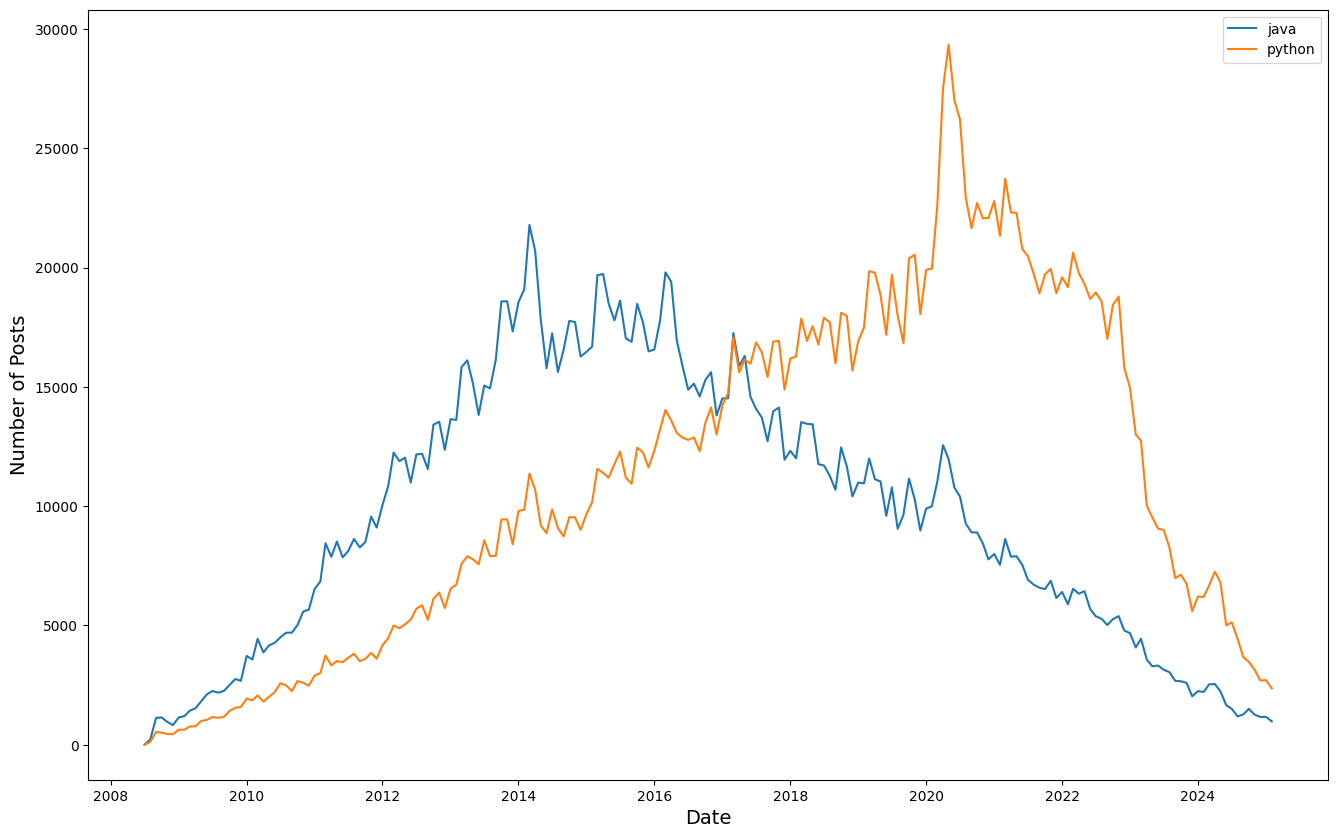

In [34]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Number of Posts', fontsize=14)
ax.plot(reshaped_df.index, reshaped_df['java'], label='java')
ax.plot(reshaped_df.index, reshaped_df['python'], label='python')
ax.legend()

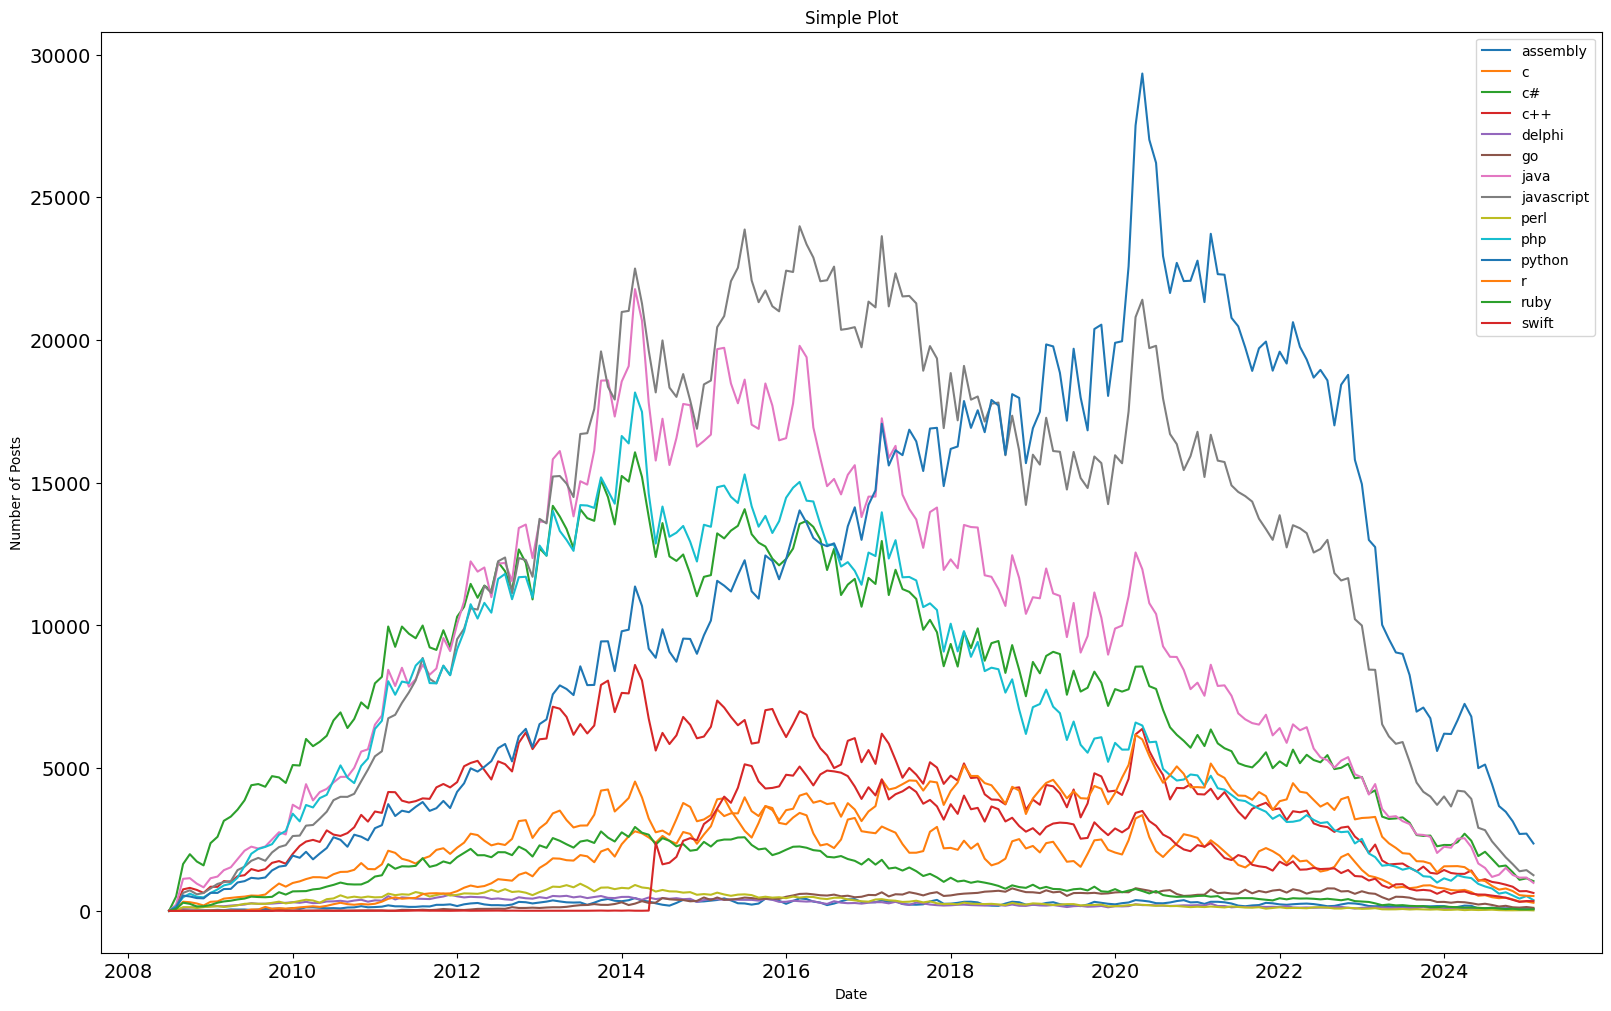

In [36]:
plt.figure(figsize=(16, 10), layout='constrained')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=column)
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title("Simple Plot")
plt.legend()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

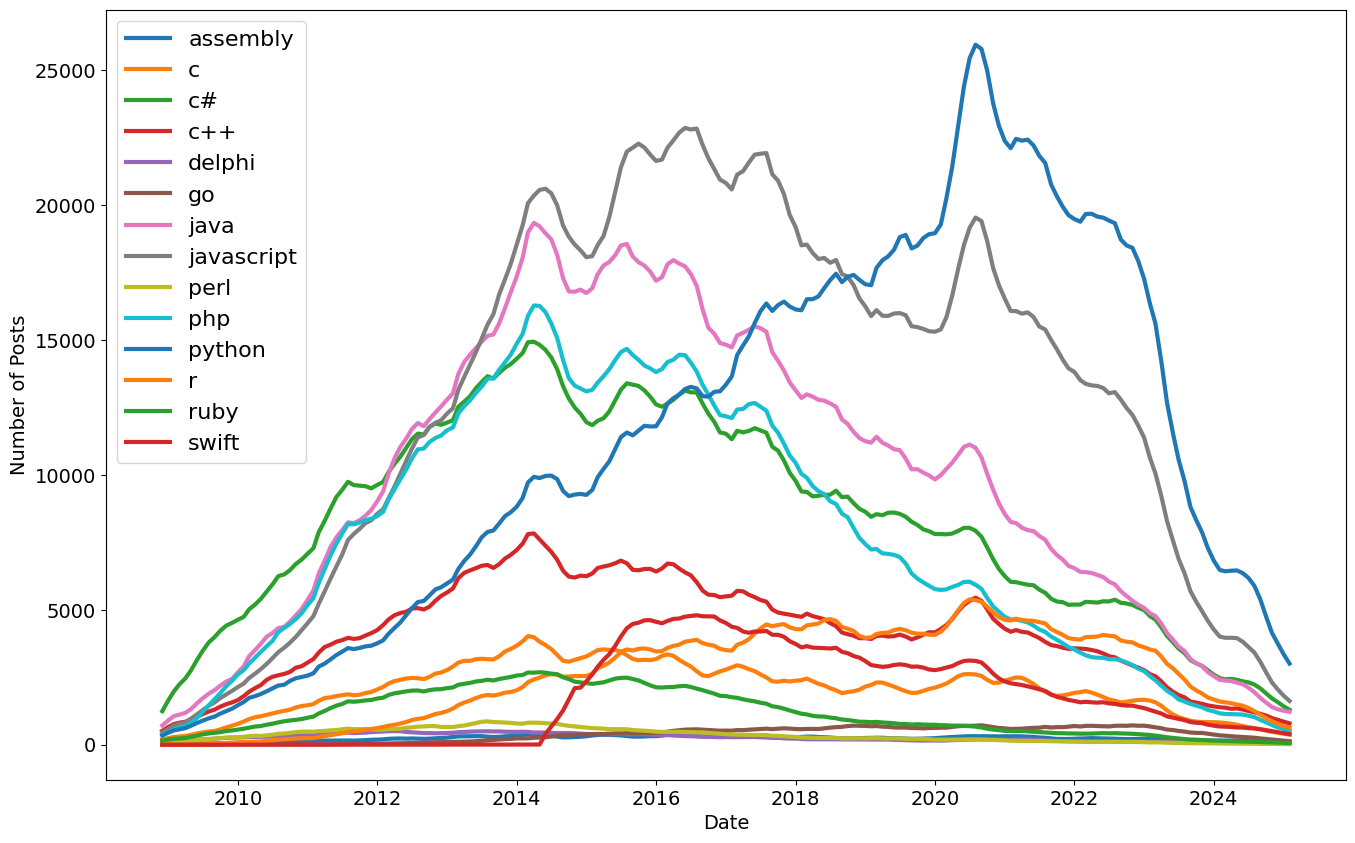

In [40]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)